# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='https://www.smartsheet.com/sites/default/files/ic-og-HumanResourceManagement-FacebookLinkedIn_0.jpg' width="700" />

>**What is the problem we are trying to solve?**<br>
 - In every organisation, for resource allocation by HR teams, they usually take responses from each teams about the tasks and if teh teams have adequate resources fro the same.
 - For Resource Planning, this activity is carried out in advance on the basis of which team planning and hiring is carried out for a given year.
 - It is usually a manual process where teams predict their capabilities and provide requirement for any resources if required.
 - If the HR teams have an automated system in place to predict if the task will be complete given the experience of employees and their training level, HR teams can be efficient in planning for hiring and allocating resources in advance.
 - In the current data set, task completion status is available for employees based on these attributes.
 - We have to develop a model to predict the task completion status given the experience and training level of employees.

>**Brief mention of key stakeholders - who would be interested in this analysis?**<br>
>1. HR Team - Since, it is not known if any given individual is capable of completing a task or not, we will use past trend to predict the capability of individuals.Based on this, employees will be allocated to tasks with best capbility to complete the task.<br>
>2. Other Teams - Across various teams in the organisation, HR teams will provide teams with employees who are best capable of finishing the task. This will result in better productivity and better performance of the teams as well as individuals.<br>

* [Go to Top](#table-of-content)

>**Business Objective:** 
For completion of tasks across business, we will be able to allocate resources adequately only if we have correct predictions for the task completion capability.

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [143]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "F1":F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

import pickle

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [144]:
# Read in data 
df = pd.read_csv('SystemAdministrators.csv')

df.tail()

,task_completed,employee_experience,training_level4,training_level6,training_level8
70,0,5.60,1,0,0
71,0,5.90,0,0,1
72,0,6.40,0,1,0
73,0,3.80,1,0,0
74,0,5.30,1,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>

>>75 records<br>
>>**Target:** task_completed (1 if task is completed, 0 otherwise<br><br>

>[Go to Data Prep Outline](#data-prep)
---

> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>

>**Note:**<br>
The dataset is already clean, and not the scope of this assignment.

> **Initial Cleanup: Summary of Actions**<br><br>
No missing values or dupes

>[Go to Data Prep Outline](#data-prep)
---

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

> **Note:**<br>
Skipping this part as mentioned above.

> **Outlier Detection: Notes/Summary of Actions**<br>
<br>
>**Note:**<br>
Skipping

>[Go to Data Prep Outline](#data-prep)
---

>**Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

>**To Do:**<br>
> 1. Include everything<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>We are taking the Train-Test split of 80%-20% as the data size is small and we need at least 80% to train the model.


In [145]:
target = ['task_completed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [146]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy<br>

>We usually take odd values for 'k' to avoid scenarios in case of a draw between the two classes.<br>

In [147]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.67
1,3,0.73
2,5,0.73
3,7,0.80
4,9,0.87
5,11,0.87
6,13,0.80
7,15,0.87
8,17,0.87
9,19,0.87


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 9 as this is the lowest value that achieves the highest accuracy value<br>

>**Re-run kNN using the value selected above:**<br>


In [148]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.87
Testing data Accuracy: 0.87


For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [149]:
class_perf_measures(knn,X_test,y_test) 

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn

,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,3,0,12,0,0.20,1.00,0.33,0.20
1,0.10,3,8,4,0,0.43,1.00,0.60,0.73
2,0.20,2,10,2,1,0.50,0.67,0.57,0.80
3,0.30,2,10,2,1,0.50,0.67,0.57,0.80
4,0.40,2,10,2,1,0.50,0.67,0.57,0.80
5,0.50,2,11,1,1,0.67,0.67,0.67,0.87
6,0.60,1,11,1,2,0.50,0.33,0.40,0.80
7,0.70,0,12,0,3,0.00,0.00,0.00,0.80
8,0.80,0,12,0,3,0.00,0.00,0.00,0.80
9,0.90,0,12,0,3,0.00,0.00,0.00,0.80


>**Logistic Model:**<br>
>Let's produce the same table above but this time using a Logistic Model




In [150]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.92
Testing data Accuracy: 0.8


>From the accuracy result for Logistic model, the accuracy for Train data is better than Test data, indicating overfitting. This is a possibility as the data size is very small. 
However, knn model seems to be a better fit here as the Accuracy for knn model is comparable for both Train and test data. We will look into this further with the AUC curve.

>For this final run of Logistic model, we will produce a table of performance measures across a range of probability threshold values.<br>

In [151]:

class_perf_measures(lr_model,X_test,y_test) 

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,3,0,12,0,0.20,1.00,0.33,0.20
1,0.10,3,9,3,0,0.50,1.00,0.67,0.80
2,0.20,2,10,2,1,0.50,0.67,0.57,0.80
3,0.30,2,10,2,1,0.50,0.67,0.57,0.80
4,0.40,2,10,2,1,0.50,0.67,0.57,0.80
5,0.50,1,11,1,2,0.50,0.33,0.40,0.80
6,0.60,1,11,1,2,0.50,0.33,0.40,0.80
7,0.70,1,11,1,2,0.50,0.33,0.40,0.80
8,0.80,1,11,1,2,0.50,0.33,0.40,0.80
9,0.90,1,11,1,2,0.50,0.33,0.40,0.80


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


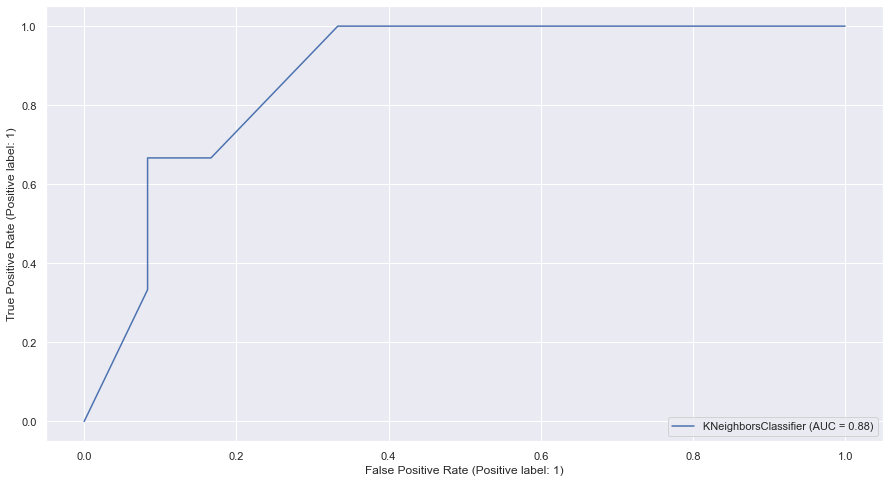

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


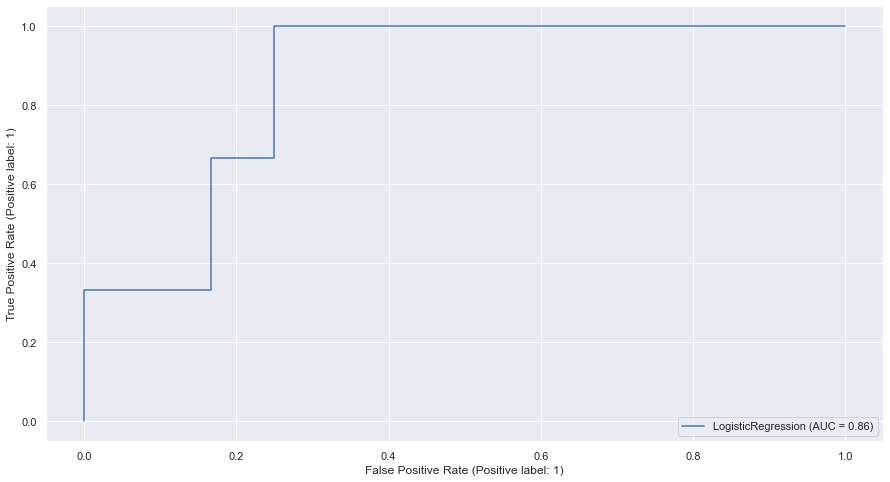

In [152]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

In [153]:
y_score = knn.predict_proba(X_test)
k = metrics.roc_auc_score(y_test,y_score[:,1])
print("Area under the Curve for kNN model is",k)

y_score1 = lr_model.predict_proba(X_test)
lr = metrics.roc_auc_score(y_test,y_score1[:,1])
print("Area under the Curve for Logistic Regression model is",lr)

Area under the Curve for kNN model is 0.875
Area under the Curve for Logistic Regression model is 0.8611111111111112


>**Decision Point:**<br>
AUC is highest for our knn Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [154]:

class_perf_measures(knn,X_test,y_test) 

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn

,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,3,0,12,0,0.20,1.00,0.33,0.20
1,0.10,3,8,4,0,0.43,1.00,0.60,0.73
2,0.20,2,10,2,1,0.50,0.67,0.57,0.80
3,0.30,2,10,2,1,0.50,0.67,0.57,0.80
4,0.40,2,10,2,1,0.50,0.67,0.57,0.80
5,0.50,2,11,1,1,0.67,0.67,0.67,0.87
6,0.60,1,11,1,2,0.50,0.33,0.40,0.80
7,0.70,0,12,0,3,0.00,0.00,0.00,0.80
8,0.80,0,12,0,3,0.00,0.00,0.00,0.80
9,0.90,0,12,0,3,0.00,0.00,0.00,0.80


**TP (True Positive) :** The task was completed and has been predicted correctly by the model.<br>
**TN (True Negative) :** The task has not been completed and correctly predicted by the model.<br>
**FP (False Positive) :** The task has not been completed but the model has incorrectly predicted it to be completed.<br>
**FN (False Negative) :** The task has been completed and has been incorrectly predicted by the model to be incomplete.<br>

**Assessing the Probability Threshold grid for kNN Model below:**<br><br>


1. **Prob Threshold = 0.1**:
    - relative low threshold required to predict positive outcomes. 
    - Accuracy is 73% which states that the model isn't too bad with the predicted probability of 10%.
    - False Positive is 4,i.e., 4 cases have been observed where task is not completed but has been predicted to be completed. In this scenario, these employees are not capable of completing the task but have been anticipated as capable and they will be assigned to teams for completion of task. It will result in the task not getting completed and thus result in loss to the company.
    - False Negative is 0, thus it wouldn't be costly to the company in any sense. Essentially, these are the employees who completed their task but were predicted to not have completed it. These effective employees will not be allocated to teams thus hindering productivity.
    - Here, since we do not have any False Negative, False positive is the only costly mistake.
<br><br>
2. **Prob Threshold = 0.5**:
    - When the predicted probability is >=50%, outcomes will be assigned as task completed.
    - This is the threshold with best accuracy score of 87%. Here, all performance measures are same at 67% (precision, recall and F1).
    - Both False Positive and False Negative are low at 1 each. For FP, the impact is that the task might not be completed and for FN, the impact is that the employee is not assigned a task.
    - Here, from business perspective, task not getting completed is costlier and thus false positive is crucial.
<br><br>
3. **Prob Threshold = 0.8**:
    -  Accuracy has reduced to 80% from 87% at threshold of 0.5.
    - False Positive is 0, there will no business impact as less capable employees won't be allocated.
    - False Negative is 3, these employees are capable but will not be allocated for completion of tasks.
    - However, we should note that beyond the threshold of 0.6, no employee is capable of completing the task which any will impact business.
<br><br>
4. **We will choose Prob Threshold = 0.5 for below reasons:**
    - The model is most accurate at this threshold.
    - Across the probability thresholds, the TP is ranging from 0-3. In this scenario, TP is 2 with low FP and FN of 1, which won't have a tremendous impact on business.
    - Probability threshold of 0.6 doesn't show any TP which will have business impact as stated above.

>[Go to Machine Learning Outline](#ml-model)
---

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>


* [Go to Top](#table-of-content)

In [114]:
pickle_out = open('classifier', mode='wb')              # We are creating a new object called 'pickle_out'.  This
                                                        # object contains a new file called 'classifier' and this
                                                        # is in 'write' mode.  And we are opening it to write 'binary'
                                                        # to it (wb).
            
pickle.dump(knn, pickle_out)                          # use the pickle library to 'export' or 'translate' our 
                                                        # previously created ML model object ('model') into the
                                                        # binary 'classifier' file created in the code immediately
                                                        # preceding this line
            
pickle_out.close()                                      # close the pickle object now that we've written our Python
                                                        # to it.

In [117]:
%%writefile app.py

import pickle
import streamlit as st


pickle_in = open('classifier', 'rb')
classifier = pickle.load(pickle_in)

@st.cache()

#Define the function which will make the prediction using data
#inputs from users
def prediction(employee_experience, training_level4, training_level6, training_level8):
    
    # Make predictions
    prediction = classifier.predict(
        [[employee_experience, training_level4, training_level6, training_level8]])
    
    if prediction == 0:
        pred = 'Task not completed'
    else:
        pred = 'Task Completed'
    return pred

# This is the main function in which we define our webpage
def main():
    
    # Create input fields
    employee_experience = st.number_input("Employee Experience (in years)",
                                  min_value=0,
                                  max_value=40,
                                  value=0,
                                  step=1,
                                 )
    training_level4 = st.number_input("Training Level (1 - if Level 4, 0 - otherwise)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )

    training_level6 = st.number_input("Training Level (1 - if Level 6, 0 - otherwise)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )
    training_level8 = st.number_input("Training Level (1 - if Level 8, 0 - otherwise)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )
    
    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(employee_experience, training_level4, training_level6, training_level8)
        st.success(result)
        
if __name__=='__main__':
    main()
    

Overwriting app.py


In [118]:
!streamlit run app.py

2022-10-18 21:24:53.760 INFO    numexpr.utils: NumExpr defaulting to 8 threads.

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.0.200:8501

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with featu